<a href="https://colab.research.google.com/github/dubeygit/Projects/blob/master/ImageClassificationKerasCNNFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Description – Image classification using CNNs in Keras


Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)


In [1]:
import numpy as np                                                                                    
import matplotlib.pyplot as plt                
import pandas as pd
import seaborn as sns
import os                                        
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
from skimage import data, io
import cv2
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
images = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')

In [5]:
print(images.shape)
print(df.shape)

(4750, 128, 128, 3)
(4750, 1)


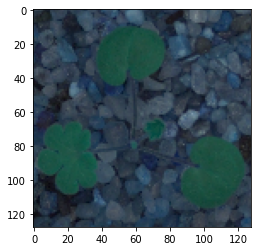

In [6]:
plt.imshow(images[50])

**Data Pre-processing:**

1.   Normalization
2.   Gaussian Blurring
3.   Visualize Data after pre-processing

In [7]:
#Normalization or resizing of images 
def resizing_image(img):
  img = np.array(img).astype(np.uint8) #converting data types
  res = cv2.resize(img,(256,256),interpolation=cv2.INTER_CUBIC)
  return res

In [8]:
#save resizing images
images = [resizing_image(img) for img in images]

In [9]:
images[50].shape

(256, 256, 3)

In [11]:
#see the number of images in each label
classes=[]
classes = df['Label']
images = np.array(images)
classes = np.array(classes)
for label in set(classes):
  print('Number of {} images is {}'.format(label,len(images[classes == label])))

Number of Small-flowered Cranesbill images is 496
Number of Common Chickweed images is 611
Number of Sugar beet images is 385
Number of Charlock images is 390
Number of Fat Hen images is 475
Number of Cleavers images is 287
Number of Shepherds Purse images is 231
Number of Maize images is 221
Number of Common wheat images is 221
Number of Black-grass images is 263
Number of Loose Silky-bent images is 654
Number of Scentless Mayweed images is 516


Text(0.5, 0.98, 'Categorical plotting of images')

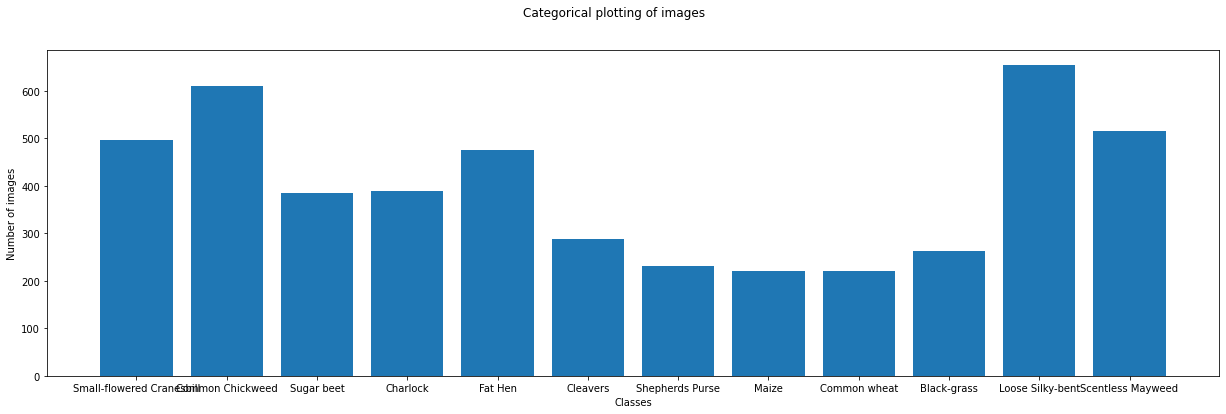

In [46]:
#Plotting each label with count of images
values=[]
labels=[]
for label in set(classes):
  values.append(len(images[classes==label]))
  labels.append(label)
fig,ax=plt.subplots(figsize=(21,6))
ax.bar(labels,values)
ax.set_xlabel('Classes')
ax.set_ylabel('Number of images')
fig.suptitle('Categorical plotting of images')

Original Image 



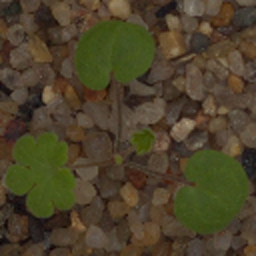


 Output after first Gaussian Blur 



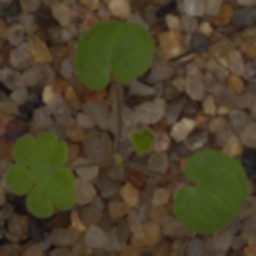


 Output after secong Guassian Blur 



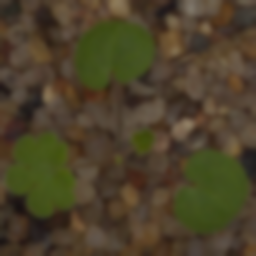

In [13]:
#Gaussian Blurring
G1 = cv2.GaussianBlur(images[50],(5,5),0)
G2 = cv2.GaussianBlur(images[50],(15,15),0)
print('Original Image \n')
cv2_imshow(images[50])
print('\n Output after first Gaussian Blur \n')
cv2_imshow(G1)
print('\n Output after secong Guassian Blur \n')
cv2_imshow(G2)

**Make data compatible:**
1. Convert labels to one-hot-vectors.
2. Print the label for y_train[0].
3. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
4. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.


In [14]:
label_df = pd.get_dummies(df['Label'])

In [15]:
print(label_df.shape)
label_df.head(10)

(4750, 12)


,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()

In [17]:
y = enc.fit_transform(label_df)

In [18]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

#Splitting data into training and testing set

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images,y,test_size=0.3,random_state=50)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 256, 256, 3)
(1425, 256, 256, 3)
(3325, 12)
(1425, 12)


In [21]:
enc.classes_[y_train[0]]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

#Splitting for validation set

In [22]:
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=2)

In [23]:
print(X_test.shape)
print(X_val.shape)

(712, 256, 256, 3)
(713, 256, 256, 3)


Data is in compatible form to proceed further

**Building CNN:**
1. Define layers.
2. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [24]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,GlobalMaxPooling2D
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator


In [25]:
batch_size=None
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',batch_input_shape=(batch_size,256,256,3)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))
model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [26]:
opt = Adam(lr=0.001)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

Fit and evaluate model and print confusion matrix. 

In [27]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/50
104/104 [==============================] - 23s 217ms/step - loss: 3.0715 - accuracy: 0.1125 - val_loss: 2.4637 - val_accuracy: 0.1066
Epoch 2/50
104/104 [==============================] - 21s 201ms/step - loss: 2.4655 - accuracy: 0.1254 - val_loss: 2.4409 - val_accuracy: 0.1066
Epoch 3/50
104/104 [==============================] - 21s 205ms/step - loss: 2.4431 - accuracy: 0.1224 - val_loss: 2.4361 - val_accuracy: 0.1290
Epoch 4/50
104/104 [==============================] - 21s 207ms/step - loss: 2.4278 - accuracy: 0.1510 - val_loss: 2.4118 - val_accuracy: 0.1683
Epoch 5/50
104/104 [==============================] - 21s 203ms/step - loss: 2.3960 - accuracy: 0.1290 - val_loss: 2.3991 - val_accuracy: 0.1473
Epoch 6/50
104/104 [==============================] - 21s 204ms/step - loss: 2.2255 - accuracy: 0.2331 - val_loss: 2.1148 - val_accuracy: 0.2735
Epoch 7/50
104/104 [==============================] - 21s 204ms/step - loss: 2.0615 - accuracy: 0.2875 - val_loss: 2.0407 - val_ac

In [28]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5528252124786377
Test accuracy: 0.8216292262077332


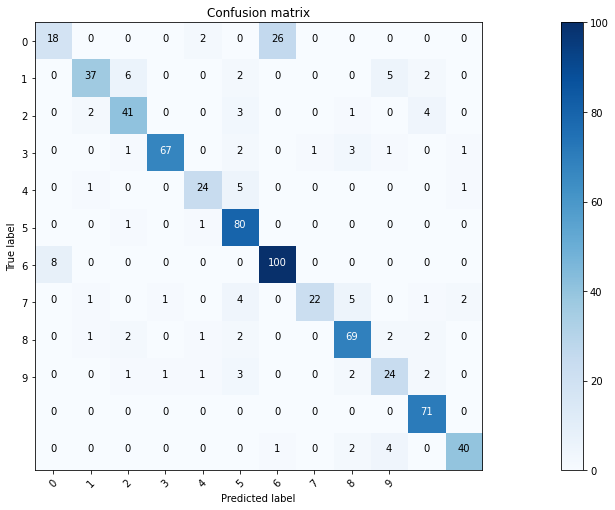

In [32]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

In [33]:
Predicted_classes = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
wrong_preds = X_test[Predicted_classes != np.argmax(y_test)]

In [34]:
set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

Predicted class: 3
Actual class: 10


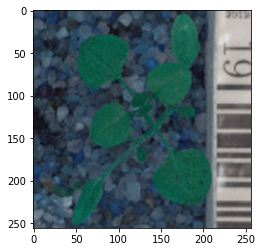

In [40]:
i = 2
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(wrong_preds[i])

Predicted class: 4
Actual class: 1


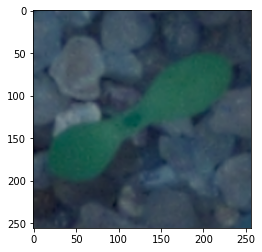

In [41]:
i = 3
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(wrong_preds[i])

Predicted class: 5
Actual class: 6


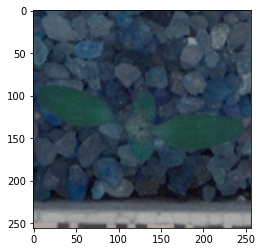

In [42]:
i = 33
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(wrong_preds[i])

Predicted class: 6
Actual class: 10


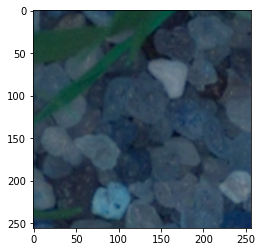

In [43]:
i = 36
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(wrong_preds[i])

Predicted class: 5
Actual class: 4


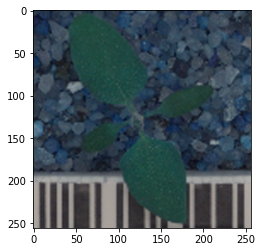

In [44]:
i = 59
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(wrong_preds[i])

In [45]:
enc.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])